<a href="https://colab.research.google.com/github/varinen/introtf/blob/master/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2

Computer vision example

In [1]:
# required imports

import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
# import MNIST Vision

mnist = tf.keras.datasets.fashion_mnist

In [0]:
# Loading data into variables

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

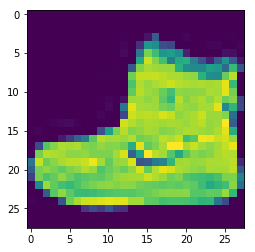

In [8]:
# explore the variables

import matplotlib.pyplot as plt
plt.imshow(training_images[0])


In [11]:
print('Labels')
print(training_labels[0])
print()
print('Pixels')
print(training_images[0])


Labels
9

Pixels
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [0]:
# normalize pixel values

training_images = training_images / 255.0
test_images = test_images / 255.0

In [0]:
# Design the model

"""Relu activation function:
if X > 0 return X else return 0,
i.e. only values equal 0 or greater are passed further down the network

Softmax activation function:
takes a set of values and set them all to 0 except the biggest one, which is
replaced by 1, i.e. a set 
[0.1, 0.1, 0.5, 1., 9.5, 0, 0.3] will turn into
[0  , 0  , 0  , 0 , 1.0, 0, 0  ]
"""

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [15]:
# Build the model, i.e, compile it using an optimizer and a loss function.
# This is followed by the model.fit expression that takes the training data

model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_images, training_labels, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.4954 - acc: 0.8264
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3732 - acc: 0.8658
Epoch 3/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3342 - acc: 0.8801
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3121 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2928 - acc: 0.8930


In [16]:
# Test with test data, that has not been seen by the model yet

model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3511 - acc: 0.8742


[0.3510888504981995, 0.8742]

## Excercises


In [23]:
# Excercise 1: Clasifications

classifications = model.predict(test_images)
print(classifications[7])

[1.8587480e-05 4.4203940e-08 1.3622411e-03 9.0081749e-06 2.6851345e-02
 1.3140735e-05 9.7172302e-01 5.5647414e-10 2.2452705e-05 1.7424058e-07]


In [24]:
test_labels[7]

6

In [25]:
classifications[7].argmax()



6

In [41]:
# Excercise 2: More neurons

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 14s 227us/sample - loss: 0.2011
Epoch 2/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0799
Epoch 3/5
60000/60000 [==============================] - 13s 217us/sample - loss: 0.0519
Epoch 4/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0362
Epoch 5/5
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0821
[1.00916042e-09 7.34012517e-10 4.65876923e-07 9.07963795e-07
 2.13724302e-14 1.36991463e-09 1.09251604e-13 9.99998450e-01
 1.37582798e-08 5.65984593e-08]
7


In [35]:
model_512.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 67us/sample - loss: 0.3692


0.3692275353193283

In [36]:
# Even more neurons

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.13.1
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 25s 412us/sample - loss: 0.1844
Epoch 2/5
60000/60000 [==============================] - 24s 403us/sample - loss: 0.0733
Epoch 3/5
60000/60000 [==============================] - 25s 419us/sample - loss: 0.0488
Epoch 4/5
60000/60000 [==============================] - 25s 422us/sample - loss: 0.0351
Epoch 5/5
10000/10000 [==============================] - 1s 90us/sample - loss: 0.0583
[1.0646527e-09 3.8825178e-08 8.6130809e-09 1.0573115e-04 1.2743943e-14
 3.5299888e-10 1.5825774e-13 9.9989378e-01 2.3456037e-09 5.0286297e-07]
7


In [40]:
# Additional Layers

import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 18s 305us/sample - loss: 0.1854
Epoch 2/5
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0810
Epoch 3/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0567
Epoch 4/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0413
Epoch 5/5
10000/10000 [==============================] - 1s 88us/sample - loss: 0.0700
[2.6228982e-12 2.9899616e-06 4.1930252e-07 8.2681163e-06 1.9633917e-09
 7.8732555e-08 1.2972052e-13 9.9998009e-01 8.4616619e-10 8.1443495e-06]
7


In [42]:
# Normalized vs Non-normalized data

# Normalized
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 15s 245us/sample - loss: 0.2030
Epoch 2/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0821
Epoch 3/5
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0546
Epoch 4/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0374
Epoch 5/5
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0674
[1.1699521e-08 6.0180336e-09 1.0764996e-06 1.0606923e-05 6.5194491e-15
 3.9463162e-09 1.3071271e-11 9.9998820e-01 8.1760296e-09 1.2859689e-07]
7


In [43]:
# Non-Normalized
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#training_images=training_images/255.0
#test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 12.0780
Epoch 2/5
60000/60000 [==============================] - 14s 233us/sample - loss: 11.9400
Epoch 3/5
60000/60000 [==============================] - 14s 232us/sample - loss: 11.7420
Epoch 4/5
60000/60000 [==============================] - 14s 233us/sample - loss: 11.7874
Epoch 5/5
10000/10000 [==============================] - 1s 98us/sample - loss: 11.4470
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
7


In [44]:
# Callbacks

import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.4767
Epoch 2/5
59808/60000 [============================>.] - ETA: 0s - loss: 0.3581
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 13s 221us/sample - loss: 0.3586
